In [1]:
import polyfingerprints as pfp
import pandas as pd
import numpy as np
from wrapconfig import YAMLWrapConfig
import matplotlib.pyplot as plt

In [2]:
RAW_CSV_PATH =  "./cloud_points_data.csv"

In [3]:
raw_df = pd.read_csv(RAW_CSV_PATH, sep=";", decimal=",")
raw_df

,reference,polymer_type,polymer_type_style,polymer_architecture,polymerisation_type,SMILES_start_group,SMILES_end_group,SMILES_repeating_unitA,molpercent_repeating_unitA,SMILES_repeating_unitB,...,additive2_concentration_molar,additive2_concentration_weight_percent,cloud_point,N/A,def_type,pH,identifier,comment,tacticity,rating
0,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,32.1,NaN,A,NaN,PNIPAM-co-AA,NaN,NaN,NaN
1,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,43.0,NaN,A,NaN,PNIPAM-cycloprop-7.5,NaN,NaN,NaN
2,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,44.0,NaN,A,NaN,PNIPAM-cyclobut-7.5,NaN,NaN,NaN
3,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,45.5,NaN,A,NaN,PNIPAM-cyclopent-7.5,NaN,NaN,NaN
4,10.1016/j.fuel.2016.10.075,random,NaN,linear,FRP,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),...,NaN,NaN,43.0,NaN,A,NaN,PNIPAM-cyclohept-7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,10.1021/ma1005759,homo,NaN,graft,RAFT,[C](C)(C#N)(CCC(=O)NCC(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2]CCCCCCCCCCCCCCC,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,...,NaN,NaN,51.7,NaN,C,NaN,P15,632 nm,NaN,NaN
907,10.1021/ma1005759,homo,NaN,graft,RAFT,[C](C)(C#N)(CCC(=O)NCC(F)(F)C(F)(F)C(F)(F)C(F)...,[S](SCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,...,NaN,NaN,50.3,NaN,C,NaN,P16,632 nm,NaN,NaN
908,10.1021/ma1005759,homo,NaN,graft,RAFT,[C](C)(C#N)(CCC(=O)N(CCCCCCCCCCCCCCCCCC)CCCCCC...,[S]SC,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,...,NaN,NaN,48.9,NaN,C,NaN,P17,632 nm,NaN,NaN
909,10.1021/ma1005759,homo,NaN,graft,RAFT,[C](C)(C#N)(CCC(=O)N(CCCCCCCCCCCCCCCCCC)CCCCCC...,[S](SCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,...,NaN,NaN,48.9,NaN,C,NaN,P18,632 nm,NaN,NaN


In [4]:
raw_df["pH"] = raw_df["pH"].fillna(7)
DEF_TYPE_MAP = {
        "A": 0.1,
        "B": 0.2,
        "C": 0.5,
        "DSC": 0.01,
    }
raw_df["def_type"] = raw_df["def_type"].fillna("0.1")
raw_df["def_type"] = raw_df["def_type"].apply(
    lambda x: float(
        (DEF_TYPE_MAP[x] if x in DEF_TYPE_MAP else str(x).replace(",", "."))
    ),
)

# set poly_conc to polymer_concentration_mass_conc where it is NaN
if "polymer_concentration_mass_conc" in raw_df.columns:
    raw_df["polymer_concentration_wpercent"] = raw_df["polymer_concentration_wpercent"].fillna(raw_df["polymer_concentration_mass_conc"])
    raw_df= raw_df.drop(
        ["polymer_concentration_mass_conc"], axis=1
    )

df,info = pfp.datareader.expand_data(
    raw_df,
    ignored_columns=["reference",
        "polymer_type",
        "polymer_type_style",
        "polymer_architecture",
        "polymerisation_type",
        "Mw",
        "PDI",
        "mass_characterisation_method",
        "mass_characterisation_standart",
        "N/A",
        "identifier",
        "comment",
        "tacticity",
        "rating",],
    density=1,
additive_wp_column_postfix = "_concentration_weight_percent",
    additive_conc_column_postfix="_concentration_molar"


)

df.to_csv("expanded_data.csv")
infofile = YAMLWrapConfig("expanded_info.yml")
infofile.set_data(info)
infofile.save()
df

[13:51:13] WARNING: not removing hydrogen atom without neighbors
[13:51:13] WARNING: not removing hydrogen atom without neighbors
[13:51:13] WARNING: not removing hydrogen atom without neighbors
[13:51:13] WARNING: not removing hydrogen atom without neighbors


,SMILES_start_group,SMILES_end_group,SMILES_repeating_unitA,molpercent_repeating_unitA,SMILES_repeating_unitB,molpercent_repeating_unitB,SMILES_repeating_unitC,molpercent_repeating_unitC,SMILES_repeating_unitD,molpercent_repeating_unitD,...,additive_24,additive_25,additive_26,additive_27,additive_28,additive_29,additive_30,additive_31,additive_32,additive_33
0,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.200,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.125,[CH2][CH](C(=O)NC1CC1),0.075,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.125,[CH2][CH](C(=O)NC1CCC1),0.075,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.125,[CH2][CH](C(=O)NC1CCCC1),0.075,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,[C](C)(C)(C#N),[C](C)(C)C#N,[CH2][CH](C(=O)NC(C)C),0.8,[CH2][CH](C(=O)O),0.125,[CH2][CH](C(=O)NC1CCCCCC1),0.075,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,[C](C)(C#N)(CCC(=O)NCC(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2]CCCCCCCCCCCCCCC,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,[C](C)(C#N)(CCC(=O)NCC(F)(F)C(F)(F)C(F)(F)C(F)...,[S](SCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,[C](C)(C#N)(CCC(=O)N(CCCCCCCCCCCCCCCCCC)CCCCCC...,[S]SC,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
909,[C](C)(C#N)(CCC(=O)N(CCCCCCCCCCCCCCCCCC)CCCCCC...,[S](SCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)...,[CH2][C](C)(C(=O)OCCOCCOCCOCCOC),1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Dataanalysis with matplotlib, seaborn and plotly - dash
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go
import plotly.express as px

In [6]:
# app = Dash(__name__)
# app.layout = html.Div([
#     html.H4('Interactive color selection with simple Dash example'),
#     html.P("Select color:"),
#     dcc.Dropdown(
#         id="dropdown",
#         options=['Gold', 'MediumTurquoise', 'LightGreen'],
#         value='Gold',
#         clearable=False,
#     ),
#     dcc.Graph(id="graph"),
# ])
#
#
# @app.callback(
#     Output("graph", "figure"),
#     Input("dropdown", "value"))
# def display_color(color):
#     fig = go.Figure(
#         data=go.Bar(y=[2, 3, 1], # replace with your own data source
#                     marker_color=color))
#     return fig
#
# app.run_server(debug=True) # set keyword argument reloader off if inside Jupyter

In [160]:
# create a depiction of all the amount of all smiles strings
c = df["SMILES_repeating_unitA"].value_counts(normalize=True)
print("number or different constitutional/repeating units: {}".format(len(c)))
# threshold for strings which are only present in less than a specific percentage of the data
frequent_strings = []
perc = 0
for s,p in zip(c.index,c.values):
    if perc < 0.95:
        perc += p
        frequent_strings.append(s)
    else:
        break
c = c.head(len(frequent_strings))

# create a list of percentages strings for each SMILES string
percentage_list = [str(perc_num) for perc_num in (np.around(c.values*100, decimals=1))]

figure = px.bar(
    x=c.index,
    y=c.values,
    title="Distribution of constitutional/repeating units",
    labels={"x": "SMILES string", "y": "Number of entries [%]"},
    height=900,
    text=percentage_list, # annotates each bar with its
)

# set lable angles diagonally
figure.update_traces(textangle=-70)
figure.update_layout(font_family = "Calibri")
figure.update_xaxes(tickangle=-70)

#creating a string for the information that was left out for better visibility
information = "Minority share = %.2f%% <br> (showing %.2f%% of all structures)"  %((1-perc)*100, perc*100)
figure.add_annotation(text=information,
                      showarrow=False,
                      bgcolor="lightblue",
                      xanchor="left",
                      y=0.2,
                      x=1
                      )

# figure.show()
print("Not printing the standard jupyter output (which would be the plot) to save resources.")

number or different constitutional/repeating units: 47
Not printing the standard jupyter output (which would be the plot) to save resources.


In [8]:
# plot the distribution of the important polymer property - here the cloud point
figure = px.histogram(
    x=df["cloud_point"],
    title="Distribution of cloud points",
    labels={"x": "Cloud point [°C]", "y": "Number of entries"},
    nbins=100,
)
figure.update_layout(font_family = "Calibri")
# figure.show()
print("Not printing the standard jupyter output (which would be the plot) to save resources.")

Not printing the standard jupyter output (which would be the plot) to save resources.


In [166]:
# two sunburst charts to show which definitions for the cloudpoint are set how many times
# we create the list of the different definitions and their counts
df_count = raw_df # we take the raw_df because we want to count the references
df_count = (df_count.groupby("def_type") ["reference"].nunique()).reset_index().rename(columns={"reference":"References"})

df_count2 = raw_df
df_count2 = df_count2.groupby("reference")["def_type"].count()

labels = ["Acquisition<br>threshold", *df_count["def_type"].tolist()]
values = [0, *df_count["References"].tolist()]
parents = ["", *["Acquisition<br>threshold" for i in range(len(df_count))]]

# create the subplots so al references per acquisition types
ref_per_acq = list()
for i in df_count2.to_dict().items(): # seeing all the acquisition types per reference
    reference= (i[0])

    results = raw_df.loc[raw_df["reference"] == reference]
    ref = results["reference"].head(1).values[0]

    dictionary_view = results["def_type"].value_counts().to_dict()
    # iterate through the dictionary to create a list
    list_view = []
    for key, value in dictionary_view.items():
        nested_list_view = [ref, key, value]
        list_view.append(nested_list_view)
    ref_per_acq += list_view

# reshape list
reshaped_list = [list(x) for x in zip(*ref_per_acq)]

labels.extend(reshaped_list[0])
parents.extend(reshaped_list[1])
values.extend(reshaped_list[2])

fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values))

# adding an information as an explanation of the threshold numbers
description = "0.5 = ideally the inflection point \n" \
              "0.2 = empirically the intersection of baseline and tangent to the inflection point \n" \
              "0.1 = often declared as first appearance of cloudiness \n" \
              "0.05 = just choosen by the authors\n" \
              "0.01 = found to be the first the onset value specifically determined through DSC\n"
print(description)

fig.show()
# print("Not printing the plot to save resources.")

0.5 = ideally the inflection point 
0.2 = empirically the intersection of baseline and tangent to the inflection point 
0.1 = often declared as first appearance of cloudiness 
0.05 = just choosen by the authors
0.01 = found to be the first the onset value specifically determined through DSC



Text(0.5, 1.0, '$T_{CP}$  Definition types')

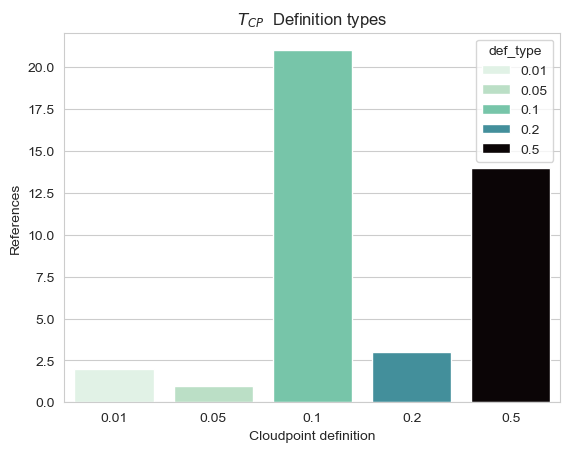

In [10]:
sns.barplot(data= df_count, x=df_count["def_type"], y=df_count["References"], palette="mako_r", hue=df_count["def_type"])
plt.xlabel("Cloudpoint definition")
plt.title("$T_{CP}$  Definition types")

In [11]:
len(results["def_type"].value_counts().to_dict())


1